In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [2]:
veri=pd.read_csv('HousingPricesAmsterdamAugust2021.csv')
veri

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [3]:
veri.head(10)  #ilk 10 satır

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
5,6,"De Wittenkade 134 I, Amsterdam",1051 AM,450000.0,53,2,4.875024,52.382228
6,7,"Pruimenstraat 18 B, Amsterdam",1033 KM,450000.0,87,3,4.896536,52.410585
7,8,"Da Costakade 32 II, Amsterdam",1053 WL,590000.0,80,2,4.871555,52.371041
8,9,"Postjeskade 41 2, Amsterdam",1058 DG,399000.0,49,3,4.854671,52.363471
9,10,"Van Ostadestraat 193 H, Amsterdam",1073 TM,300000.0,33,2,4.897142,52.353111


In [4]:
veri.isnull().sum()  #eksik veri var mı diye kontrol eder

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [5]:
veri2=veri.dropna()    #eksik verileri kaldırır gecici
veri2

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268


In [6]:
veri2['PriceM2']=veri2.Price/veri2.Area  
#burada Fiyat ve alan bölerek m2 başına düşen veriyi bulmak için yaptık ve PriceM2 diye yeni sütün ekledik
veri2

C:\Users\muham\AppData\Local\Temp\ipykernel_16768\2734647320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veri2['PriceM2']=veri2.Price/veri2.Area


,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat,PriceM2
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157,10703.125000
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586,7916.666667
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782,7798.165138
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712,4531.250000
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538,5217.391304
...,...,...,...,...,...,...,...,...,...
919,920,"Ringdijk, Amsterdam",1097 AE,750000.0,117,1,4.927757,52.354173,6410.256410
920,921,"Kleine Beerstraat 31, Amsterdam",1033 CP,350000.0,72,3,4.890612,52.414587,4861.111111
921,922,"Stuyvesantstraat 33 II, Amsterdam",1058 AK,350000.0,51,3,4.856935,52.363256,6862.745098
922,923,"John Blankensteinstraat 51, Amsterdam",1095 MB,599000.0,113,4,4.965731,52.375268,5300.884956


<AxesSubplot: xlabel='Room'>

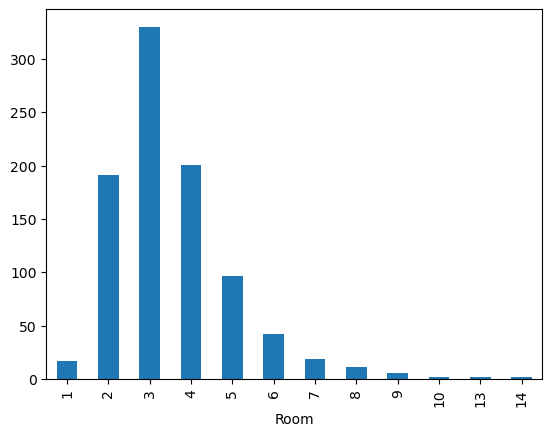

In [7]:
Rooms=veri2.groupby('Room').size()
Rooms.plot.bar()

In [8]:
veri2[veri2.Room>10]  #10 dan fazla olan odalar

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat,PriceM2
103,104,"Westeinde 16, Amsterdam",1017 ZP,4550000.0,497,13,4.898620,52.358798,9154.929577
305,306,"Singel 318, Amsterdam",1016 AE,4900000.0,623,13,4.887869,52.371039,7865.168539
308,309,"Broekergouw 4, Amsterdam",1027 AH,1695000.0,467,14,4.970830,52.412038,3629.550321
837,838,"Oranje Nassaulaan 9, Amsterdam",1075 AH,5850000.0,480,14,4.863729,52.354874,12187.500000


In [9]:
##Veriyi Temizle
veriSaglik=veri2.drop(['Address','Zip'],axis=1)
veriSaglik

,Unnamed: 0,Price,Area,Room,Lon,Lat,PriceM2
0,1,685000.0,64,3,4.907736,52.356157,10703.125000
1,2,475000.0,60,3,4.850476,52.348586,7916.666667
2,3,850000.0,109,4,4.944774,52.343782,7798.165138
3,4,580000.0,128,6,4.789928,52.343712,4531.250000
4,5,720000.0,138,5,4.902503,52.410538,5217.391304
...,...,...,...,...,...,...,...
919,920,750000.0,117,1,4.927757,52.354173,6410.256410
920,921,350000.0,72,3,4.890612,52.414587,4861.111111
921,922,350000.0,51,3,4.856935,52.363256,6862.745098
922,923,599000.0,113,4,4.965731,52.375268,5300.884956


In [10]:
veriSaglik.describe() #veri seti ile ilgili tanımlamalar  gelir stır ütün

,Unnamed: 0,Price,Area,Room,Lon,Lat,PriceM2
count,920.000000,9.200000e+02,920.000000,920.00000,920.000000,920.000000,920.000000
mean,462.625000,6.220654e+05,95.607609,3.56413,4.888652,52.363271,6479.852299
std,266.924298,5.389942e+05,56.849699,1.57103,0.053118,0.024054,2219.265218
min,1.000000,1.750000e+05,21.000000,1.00000,4.644819,52.291519,2430.555556
25%,231.750000,3.500000e+05,60.000000,3.00000,4.855834,52.351925,4649.086379
50%,462.500000,4.670000e+05,83.000000,3.00000,4.886818,52.364499,6578.947368
75%,693.250000,7.000000e+05,113.000000,4.00000,4.922337,52.377545,7768.912530
max,924.000000,5.950000e+06,623.000000,14.00000,5.029122,52.423805,25252.808989


<AxesSubplot: xlabel='Price'>

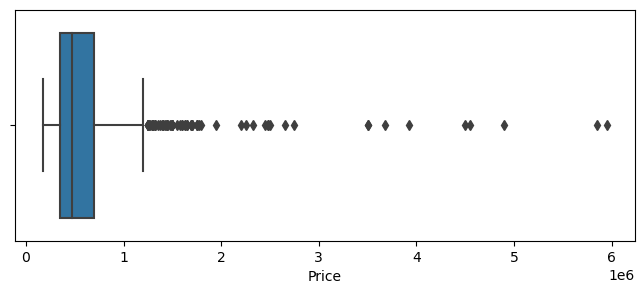

In [11]:
plt.figure(figsize=(8,3))
sns.boxplot(data=veriSaglik,x=veriSaglik['Price'])

In [12]:
#Yukarıdaki görselde daha iyi bir tahmin yapılabilmesi için aralıklı 
#yerleri düzenlememiz gerekebiliR
#outlieraları çıkaralım
q1=veriSaglik.describe()['Price']['25%']
q3=veriSaglik.describe()['Price']['75%']


In [13]:
fark=q3-q1
max_ucret=q3+1.5*fark
outlier=veriSaglik[veriSaglik['Price']>=max_ucret]
outlier  #71 tanesi outliear

,Unnamed: 0,Price,Area,Room,Lon,Lat,PriceM2
20,21,1625000.0,199,6,4.885830,52.374742,8165.829146
28,29,1650000.0,235,7,4.820848,52.358631,7021.276596
31,32,1950000.0,258,4,4.887444,52.385346,7558.139535
33,34,3925000.0,319,7,4.875471,52.361571,12304.075235
57,58,1295000.0,145,5,4.899520,52.367261,8931.034483
...,...,...,...,...,...,...,...
885,886,1450000.0,273,5,4.942112,52.376819,5311.355311
902,903,1300000.0,139,5,4.879252,52.370823,9352.517986
906,907,1250000.0,180,9,4.914882,52.388128,6944.444444
910,911,1698000.0,205,5,4.860637,52.351894,8282.926829


<AxesSubplot: xlabel='Price'>

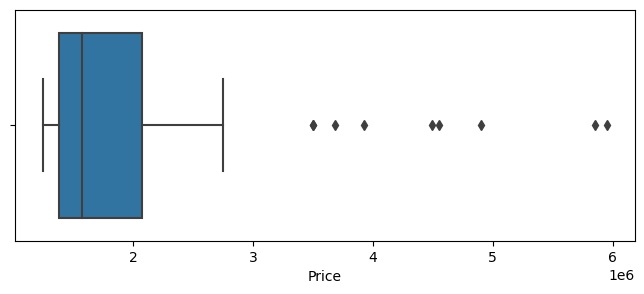

In [14]:
plt.figure(figsize=(8,3))
sns.boxplot(data=outlier,x=outlier['Price'])

<AxesSubplot: >

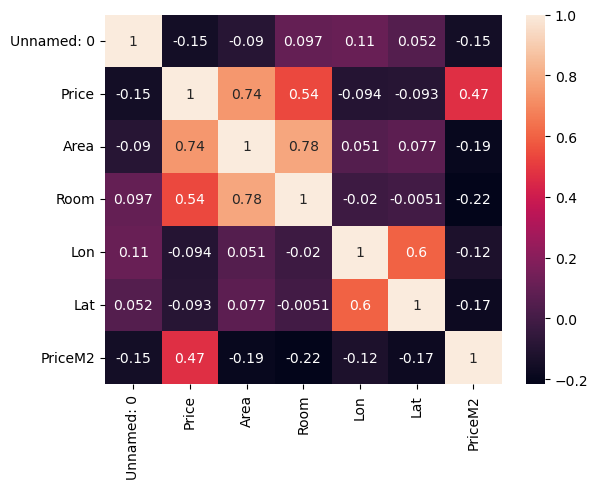

In [15]:
#korelasyon
sns.heatmap(outlier.corr(),annot=True)

In [16]:
#MODEL

y=outlier['Price']
x=outlier.drop(['Price','PriceM2'],axis=1)

In [17]:
y

20     1625000.0
28     1650000.0
31     1950000.0
33     3925000.0
57     1295000.0
         ...    
885    1450000.0
902    1300000.0
906    1250000.0
910    1698000.0
917    1500000.0
Name: Price, Length: 71, dtype: float64

In [18]:
x.head()

,Unnamed: 0,Area,Room,Lon,Lat
20,21,199,6,4.885830,52.374742
28,29,235,7,4.820848,52.358631
31,32,258,4,4.887444,52.385346
33,34,319,7,4.875471,52.361571
57,58,145,5,4.899520,52.367261


In [19]:
y.head()

20    1625000.0
28    1650000.0
31    1950000.0
33    3925000.0
57    1295000.0
Name: Price, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)

In [22]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
pred=model.predict(x_test)

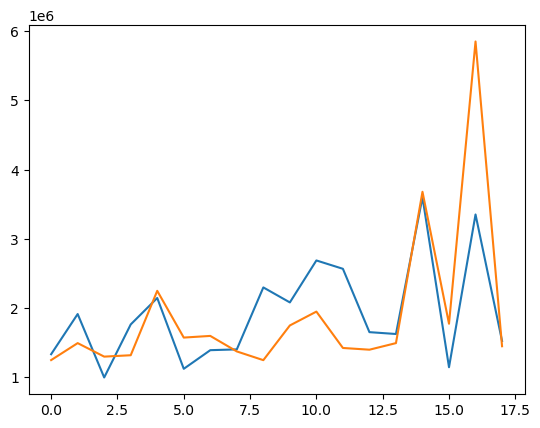

In [24]:
plt.plot(pred)
plt.plot(np.array(y_test))

In [25]:
model.score(x_train,y_train)

0.5518912088882207

In [26]:
model.score(x_test,y_test)

0.5208566652478326

In [102]:
#linearRegression için gerçekten tahmini çıkardık
mae_lr=np.mean(np.abs(np.array(y_test)-pred))
mae_lr

498324.7403349711

In [103]:
##----------------------------------------------DERS-2------------------------------------------------------

In [104]:
#random tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [105]:
model_rf=RandomForestRegressor()

In [106]:
x_train.shape

(53, 5)

In [107]:
y_train.shape

(53,)

In [108]:
x_test

,Unnamed: 0,Area,Room,Lon,Lat
856,857,157,4,4.876006,52.362028
257,258,214,5,5.029122,52.413550
902,903,139,5,4.879252,52.370823
613,614,230,8,4.894964,52.358917
261,262,250,8,4.915246,52.364132
769,770,138,4,4.961457,52.382570
327,328,139,5,4.868596,52.361672
283,284,115,3,4.881814,52.361226
320,321,258,5,4.967897,52.410672
274,275,246,8,4.909819,52.368653


In [109]:
y_train

663    1750000.0
314    1395000.0
345    1250000.0
280    2325000.0
218    1275000.0
728    1250000.0
33     3925000.0
287    2475000.0
279    1700000.0
702    1325000.0
174    1450000.0
195    5950000.0
209    1500000.0
289    1695000.0
233    1795000.0
171    1300000.0
201    1550000.0
20     1625000.0
885    1450000.0
304    1400000.0
789    1325000.0
906    1250000.0
184    2475000.0
220    1595000.0
276    3500000.0
264    2750000.0
292    2500000.0
308    1695000.0
231    2450000.0
57     1295000.0
193    1295000.0
263    1650000.0
262    1350000.0
295    2650000.0
177    1500000.0
664    1250000.0
202    1250000.0
917    1500000.0
217    1499000.0
334    3500000.0
253    2200000.0
103    4550000.0
755    1625000.0
305    4900000.0
157    1700000.0
910    1698000.0
28     1650000.0
198    1450000.0
849    1450000.0
88     1475000.0
172    1750000.0
179    4495000.0
284    1250000.0
Name: Price, dtype: float64

In [110]:
model_rf.fit(x_train,y_train)

RandomForestRegressor()

In [111]:
#prediction yapalım
pred_rf=model_rf.predict(x_test)
pred_rf

array([1407950., 1822650., 1310400., 1725840., 1879200., 1350100.,
       1424050., 1572150., 1609850., 1829390., 1925230., 2020040.,
       1476250., 1878350., 3254900., 2437530., 4186330., 1307600.])

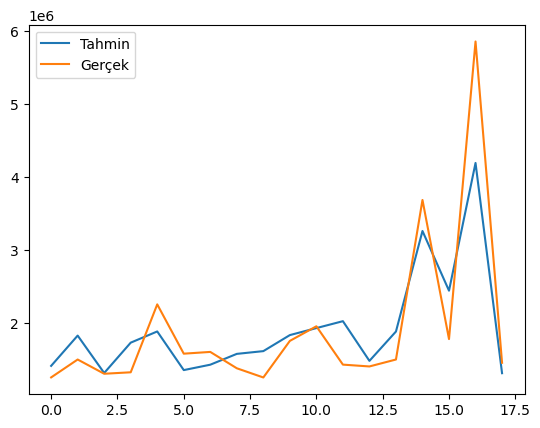

In [112]:
plt.plot(pred_rf,label="Tahmin")
plt.plot(np.array(y_test),label="Gerçek")
plt.legend()
plt.show()


In [113]:
#linearRegression için gerçekten tahmini çıkardık
mae_lr=np.mean(np.abs(np.array(y_test)-pred))
mae_lr

498324.7403349711

In [114]:
#random forest için çıkaralım
mae_rf=np.mean(np.abs(np.array(y_test)-pred_rf))
mae_rf

349055.0

In [15]:
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Input, LeakyReLU, Flatten, Dense, Dropout
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [16]:
y=outlier['Price']
x=outlier.drop(['Price','PriceM2'],axis=1)

NameError: name 'outlier' is not defined

In [17]:
x_test.shape

NameError: name 'x_test' is not defined

In [18]:
x_train.shape

NameError: name 'x_train' is not defined

In [119]:
x_val = x_diger[:125]
y_val = y_diger[:125]

NameError: name 'x_diger' is not defined

In [124]:
x_test = x_diger[125:]
y_test = y_diger[125:]

NameError: name 'x_diger' is not defined

In [125]:
#modelimizi eğitelim

K.clear_session()  #önceki model oluşturulduysa temizlenir

input_=Input(batch_shape=(None,5))

init=RandomNormal(mean=0,stddev=0.5)

out=Flatten()(input_)

out=Dense(50,kernel_initializer=init)(out)
out=LeakyReLU(alpha=0.1)(out)

out=Dense(50,kernel_initializer=init)(out)
out=LeakyReLU(alpha=0.1)(out)

out=Dense(1,activation='linear')(out)  

##Buraya kadar bir nevi modelimize gerekli kütüphane gibi düşünün yüklendi 
#Modelimize gelelim

model_dl=Model(inputs=input_,outputs=out)

C:\Users\muham\anaconda3\envs\tensorflow\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [126]:
model_dl.summary()  #buradan modelimize bakabiliriz kaç tane eğitileilir veri var ....vs

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 flatten (Flatten)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 50)                300       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51    

In [127]:
#şimdi bu modeli nasıl eğiticeğimize gelelim

checkpoint=ModelCheckpoint('regresyon_dl.hs',monitor="val_loss",verbose=1,save_best_only=True,save_weights_only=False)

In [128]:
model_dl.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001), loss='mae')

C:\Users\muham\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [178]:
history = model_dl.fit(np.array(x_train),
                      np.array(y_train),
                      epochs=3000,
                      batch_size=50,
                      steps_per_epoch=10,
                      callbacks=[checkpoint],
                      validation_data= (np.array(x_val), np.array(y_val)),
                      validation_steps=2)

Epoch 1/3000
 1/10 [==>...........................] - ETA: 0s - loss: 466905.3750WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 2 batches). You may need to use the repeat() function when building your dataset.

Epoch 1: val_loss improved from 1900501.50000 to 433364.81250, saving model to regresyon_dl.hs
INFO:tensorflow:Assets written to: regresyon_dl.hs\assets
10/10 [==============================] - 3s 337ms/step - loss: 456590.0625 - val_loss: 433364.8125
Epoch 2/3000
10/10 [==============================] - 0s 8ms/step - loss: 456645.0312
Epoch 3/3000
10/10 [==============================] - 0s 11ms/step - loss: 456202.7500
Epoch 4/3000
10/10 [==============================] - 0s 8ms/step - loss: 456062.3125
Epoch 5/3000
10/10 [==============================] - 0s 7ms/step - loss: 456043.7188
Epoch 6/3000
10/10 [==============================] - 0s

10/10 [==============================] - 0s 8ms/step - loss: 456173.8125
Epoch 35/3000
10/10 [==============================] - 0s 7ms/step - loss: 455952.4062
Epoch 36/3000
10/10 [==============================] - 0s 9ms/step - loss: 455963.8750
Epoch 37/3000
10/10 [==============================] - 0s 9ms/step - loss: 455908.0625
Epoch 38/3000
10/10 [==============================] - 0s 9ms/step - loss: 456143.6562
Epoch 39/3000
10/10 [==============================] - 0s 8ms/step - loss: 457221.4688
Epoch 40/3000
10/10 [==============================] - 0s 7ms/step - loss: 457274.8750
Epoch 41/3000
10/10 [==============================] - 0s 9ms/step - loss: 456523.1250
Epoch 42/3000
10/10 [==============================] - 0s 9ms/step - loss: 456007.3125
Epoch 43/3000
10/10 [==============================] - 0s 11ms/step - loss: 455912.0000
Epoch 44/3000
10/10 [==============================] - 0s 9ms/step - loss: 455992.7812
Epoch 45/3000
10/10 [==============================] - 0

10/10 [==============================] - 0s 9ms/step - loss: 456496.0312
Epoch 70/3000
10/10 [==============================] - 0s 8ms/step - loss: 456880.7500
Epoch 71/3000
10/10 [==============================] - 0s 9ms/step - loss: 456506.0625
Epoch 72/3000
10/10 [==============================] - 0s 11ms/step - loss: 456339.5000
Epoch 73/3000
10/10 [==============================] - 0s 11ms/step - loss: 456587.5625
Epoch 74/3000
10/10 [==============================] - 0s 12ms/step - loss: 456415.1562
Epoch 75/3000
10/10 [==============================] - 0s 9ms/step - loss: 456537.0312
Epoch 76/3000
10/10 [==============================] - 0s 9ms/step - loss: 456655.1562
Epoch 77/3000
10/10 [==============================] - 0s 10ms/step - loss: 456595.5625
Epoch 78/3000
10/10 [==============================] - 0s 8ms/step - loss: 456574.2500
Epoch 79/3000
10/10 [==============================] - 0s 9ms/step - loss: 456584.7188
Epoch 80/3000
10/10 [==============================] 

10/10 [==============================] - 0s 9ms/step - loss: 457747.5625
Epoch 105/3000
10/10 [==============================] - 0s 7ms/step - loss: 456211.2500
Epoch 106/3000
10/10 [==============================] - 0s 7ms/step - loss: 456168.8438
Epoch 107/3000
10/10 [==============================] - 0s 7ms/step - loss: 456093.7812
Epoch 108/3000
10/10 [==============================] - 0s 9ms/step - loss: 456059.0625
Epoch 109/3000
10/10 [==============================] - 0s 7ms/step - loss: 456027.8750
Epoch 110/3000
10/10 [==============================] - 0s 8ms/step - loss: 456529.9062
Epoch 111/3000
10/10 [==============================] - 0s 6ms/step - loss: 456559.2500
Epoch 112/3000
10/10 [==============================] - 0s 7ms/step - loss: 456087.0312
Epoch 113/3000
10/10 [==============================] - 0s 7ms/step - loss: 455702.1562
Epoch 114/3000
10/10 [==============================] - 0s 9ms/step - loss: 455742.5625
Epoch 115/3000
10/10 [=========================

10/10 [==============================] - 0s 7ms/step - loss: 456709.0000
Epoch 140/3000
10/10 [==============================] - 0s 7ms/step - loss: 456914.0000
Epoch 141/3000
10/10 [==============================] - 0s 7ms/step - loss: 456653.0625
Epoch 142/3000
10/10 [==============================] - 0s 7ms/step - loss: 456797.1875
Epoch 143/3000
10/10 [==============================] - 0s 7ms/step - loss: 456773.0625
Epoch 144/3000
10/10 [==============================] - 0s 7ms/step - loss: 456359.4062
Epoch 145/3000
10/10 [==============================] - 0s 7ms/step - loss: 455926.8750
Epoch 146/3000
10/10 [==============================] - 0s 7ms/step - loss: 455874.1875
Epoch 147/3000
10/10 [==============================] - 0s 7ms/step - loss: 455865.0000
Epoch 148/3000
10/10 [==============================] - 0s 7ms/step - loss: 455647.9688
Epoch 149/3000
10/10 [==============================] - 0s 8ms/step - loss: 455665.6875
Epoch 150/3000
10/10 [=========================

10/10 [==============================] - 0s 8ms/step - loss: 456072.2812
Epoch 175/3000
10/10 [==============================] - 0s 7ms/step - loss: 456886.5938
Epoch 176/3000
10/10 [==============================] - 0s 7ms/step - loss: 456818.0312
Epoch 177/3000
10/10 [==============================] - 0s 8ms/step - loss: 456167.6250
Epoch 178/3000
10/10 [==============================] - 0s 7ms/step - loss: 455573.8438
Epoch 179/3000
10/10 [==============================] - 0s 7ms/step - loss: 455872.4688
Epoch 180/3000
10/10 [==============================] - 0s 6ms/step - loss: 455612.3125
Epoch 181/3000
10/10 [==============================] - 0s 7ms/step - loss: 455535.4688
Epoch 182/3000
10/10 [==============================] - 0s 7ms/step - loss: 455907.1250
Epoch 183/3000
10/10 [==============================] - 0s 8ms/step - loss: 456232.9688
Epoch 184/3000
10/10 [==============================] - 0s 8ms/step - loss: 455582.4375
Epoch 185/3000
10/10 [=========================

10/10 [==============================] - 0s 7ms/step - loss: 455551.1562
Epoch 210/3000
10/10 [==============================] - 0s 7ms/step - loss: 455838.0625
Epoch 211/3000
10/10 [==============================] - 0s 8ms/step - loss: 455881.3438
Epoch 212/3000
10/10 [==============================] - 0s 7ms/step - loss: 455596.2812
Epoch 213/3000
10/10 [==============================] - 0s 8ms/step - loss: 455578.9688
Epoch 214/3000
10/10 [==============================] - 0s 8ms/step - loss: 455788.5000
Epoch 215/3000
10/10 [==============================] - 0s 7ms/step - loss: 455537.8750
Epoch 216/3000
10/10 [==============================] - 0s 7ms/step - loss: 455972.0938
Epoch 217/3000
10/10 [==============================] - 0s 7ms/step - loss: 456555.3125
Epoch 218/3000
10/10 [==============================] - 0s 7ms/step - loss: 457206.5625
Epoch 219/3000
10/10 [==============================] - 0s 7ms/step - loss: 457572.6875
Epoch 220/3000
10/10 [=========================

10/10 [==============================] - 0s 7ms/step - loss: 455482.6562
Epoch 245/3000
10/10 [==============================] - 0s 8ms/step - loss: 455527.7188
Epoch 246/3000
10/10 [==============================] - 0s 8ms/step - loss: 456058.9062
Epoch 247/3000
10/10 [==============================] - 0s 8ms/step - loss: 456314.7812
Epoch 248/3000
10/10 [==============================] - 0s 9ms/step - loss: 455941.2188
Epoch 249/3000
10/10 [==============================] - 0s 9ms/step - loss: 455636.9062
Epoch 250/3000
10/10 [==============================] - 0s 8ms/step - loss: 455610.2188
Epoch 251/3000
10/10 [==============================] - 0s 8ms/step - loss: 455478.4688
Epoch 252/3000
10/10 [==============================] - 0s 7ms/step - loss: 455513.4688
Epoch 253/3000
10/10 [==============================] - 0s 9ms/step - loss: 455511.6875
Epoch 254/3000
10/10 [==============================] - 0s 8ms/step - loss: 455535.9062
Epoch 255/3000
10/10 [=========================

10/10 [==============================] - 0s 8ms/step - loss: 455871.5312
Epoch 280/3000
10/10 [==============================] - 0s 8ms/step - loss: 455552.1875
Epoch 281/3000
10/10 [==============================] - 0s 8ms/step - loss: 456625.0000
Epoch 282/3000
10/10 [==============================] - 0s 7ms/step - loss: 457827.1250
Epoch 283/3000
10/10 [==============================] - 0s 7ms/step - loss: 457284.4375
Epoch 284/3000
10/10 [==============================] - 0s 8ms/step - loss: 456761.9375
Epoch 285/3000
10/10 [==============================] - 0s 7ms/step - loss: 456755.4688
Epoch 286/3000
10/10 [==============================] - 0s 7ms/step - loss: 455854.5312
Epoch 287/3000
10/10 [==============================] - 0s 7ms/step - loss: 455539.3125
Epoch 288/3000
10/10 [==============================] - 0s 8ms/step - loss: 455546.9688
Epoch 289/3000
10/10 [==============================] - 0s 8ms/step - loss: 455904.5938
Epoch 290/3000
10/10 [=========================

10/10 [==============================] - 0s 8ms/step - loss: 455898.5625
Epoch 315/3000
10/10 [==============================] - 0s 8ms/step - loss: 457065.0625
Epoch 316/3000
10/10 [==============================] - 0s 8ms/step - loss: 457297.6562
Epoch 317/3000
10/10 [==============================] - 0s 7ms/step - loss: 456537.7188
Epoch 318/3000
10/10 [==============================] - 0s 8ms/step - loss: 455873.7188
Epoch 319/3000
10/10 [==============================] - 0s 7ms/step - loss: 455481.6250
Epoch 320/3000
10/10 [==============================] - 0s 8ms/step - loss: 455745.8125
Epoch 321/3000
10/10 [==============================] - 0s 7ms/step - loss: 455466.9375
Epoch 322/3000
10/10 [==============================] - 0s 6ms/step - loss: 455917.4062
Epoch 323/3000
10/10 [==============================] - 0s 7ms/step - loss: 456149.2812
Epoch 324/3000
10/10 [==============================] - 0s 8ms/step - loss: 455427.0938
Epoch 325/3000
10/10 [=========================

10/10 [==============================] - 0s 7ms/step - loss: 455580.2500
Epoch 350/3000
10/10 [==============================] - 0s 8ms/step - loss: 456574.8750
Epoch 351/3000
10/10 [==============================] - 0s 7ms/step - loss: 456775.6875
Epoch 352/3000
10/10 [==============================] - 0s 8ms/step - loss: 456934.9688
Epoch 353/3000
10/10 [==============================] - 0s 8ms/step - loss: 457159.7812
Epoch 354/3000
10/10 [==============================] - 0s 7ms/step - loss: 456768.2188
Epoch 355/3000
10/10 [==============================] - 0s 8ms/step - loss: 456236.5625
Epoch 356/3000
10/10 [==============================] - 0s 7ms/step - loss: 455496.0000
Epoch 357/3000
10/10 [==============================] - 0s 7ms/step - loss: 455862.4688
Epoch 358/3000
10/10 [==============================] - 0s 7ms/step - loss: 456309.9062
Epoch 359/3000
10/10 [==============================] - 0s 7ms/step - loss: 456154.3125
Epoch 360/3000
10/10 [=========================

10/10 [==============================] - 0s 7ms/step - loss: 455212.6875
Epoch 385/3000
10/10 [==============================] - 0s 7ms/step - loss: 455343.5312
Epoch 386/3000
10/10 [==============================] - 0s 7ms/step - loss: 455259.6562
Epoch 387/3000
10/10 [==============================] - 0s 7ms/step - loss: 455121.0000
Epoch 388/3000
10/10 [==============================] - 0s 8ms/step - loss: 455152.3438
Epoch 389/3000
10/10 [==============================] - 0s 8ms/step - loss: 455664.6562
Epoch 390/3000
10/10 [==============================] - 0s 7ms/step - loss: 455585.5938
Epoch 391/3000
10/10 [==============================] - 0s 7ms/step - loss: 455353.6562
Epoch 392/3000
10/10 [==============================] - 0s 7ms/step - loss: 455449.1562
Epoch 393/3000
10/10 [==============================] - 0s 7ms/step - loss: 455395.7188
Epoch 394/3000
10/10 [==============================] - 0s 7ms/step - loss: 455349.5625
Epoch 395/3000
10/10 [=========================

10/10 [==============================] - 0s 7ms/step - loss: 455360.5312
Epoch 420/3000
10/10 [==============================] - 0s 7ms/step - loss: 455715.3750
Epoch 421/3000
10/10 [==============================] - 0s 7ms/step - loss: 455234.2188
Epoch 422/3000
10/10 [==============================] - 0s 7ms/step - loss: 455798.6250
Epoch 423/3000
10/10 [==============================] - 0s 7ms/step - loss: 455997.7812
Epoch 424/3000
10/10 [==============================] - 0s 7ms/step - loss: 456023.3750
Epoch 425/3000
10/10 [==============================] - 0s 7ms/step - loss: 455938.4375
Epoch 426/3000
10/10 [==============================] - 0s 7ms/step - loss: 455871.9375
Epoch 427/3000
10/10 [==============================] - 0s 7ms/step - loss: 455613.6250
Epoch 428/3000
10/10 [==============================] - 0s 7ms/step - loss: 455170.2188
Epoch 429/3000
10/10 [==============================] - 0s 7ms/step - loss: 455260.6875
Epoch 430/3000
10/10 [=========================

10/10 [==============================] - 0s 8ms/step - loss: 455253.5938
Epoch 455/3000
10/10 [==============================] - 0s 8ms/step - loss: 455012.2500
Epoch 456/3000
10/10 [==============================] - 0s 8ms/step - loss: 455137.3750
Epoch 457/3000
10/10 [==============================] - 0s 8ms/step - loss: 455904.2500
Epoch 458/3000
10/10 [==============================] - 0s 8ms/step - loss: 456089.2188
Epoch 459/3000
10/10 [==============================] - 0s 7ms/step - loss: 455692.3750
Epoch 460/3000
10/10 [==============================] - 0s 7ms/step - loss: 455213.9688
Epoch 461/3000
10/10 [==============================] - 0s 10ms/step - loss: 456109.8438
Epoch 462/3000
10/10 [==============================] - 0s 8ms/step - loss: 457370.5625
Epoch 463/3000
10/10 [==============================] - 0s 7ms/step - loss: 456558.3125
Epoch 464/3000
10/10 [==============================] - 0s 8ms/step - loss: 455850.4375
Epoch 465/3000
10/10 [========================

10/10 [==============================] - 0s 7ms/step - loss: 454882.3125
Epoch 490/3000
10/10 [==============================] - 0s 7ms/step - loss: 454814.8125
Epoch 491/3000
10/10 [==============================] - 0s 7ms/step - loss: 454894.2500
Epoch 492/3000
10/10 [==============================] - 0s 7ms/step - loss: 455161.0000
Epoch 493/3000
10/10 [==============================] - 0s 7ms/step - loss: 454949.0312
Epoch 494/3000
10/10 [==============================] - 0s 7ms/step - loss: 455026.3750
Epoch 495/3000
10/10 [==============================] - 0s 8ms/step - loss: 455137.5938
Epoch 496/3000
10/10 [==============================] - 0s 8ms/step - loss: 455120.7812
Epoch 497/3000
10/10 [==============================] - 0s 7ms/step - loss: 455009.7188
Epoch 498/3000
10/10 [==============================] - 0s 7ms/step - loss: 455118.9375
Epoch 499/3000
10/10 [==============================] - 0s 7ms/step - loss: 454918.6250
Epoch 500/3000
10/10 [=========================

10/10 [==============================] - 0s 7ms/step - loss: 454918.9688
Epoch 525/3000
10/10 [==============================] - 0s 7ms/step - loss: 455522.5312
Epoch 526/3000
10/10 [==============================] - 0s 7ms/step - loss: 456758.8750
Epoch 527/3000
10/10 [==============================] - 0s 7ms/step - loss: 457096.3438
Epoch 528/3000
10/10 [==============================] - 0s 6ms/step - loss: 456808.5000
Epoch 529/3000
10/10 [==============================] - 0s 7ms/step - loss: 455842.0938
Epoch 530/3000
10/10 [==============================] - 0s 7ms/step - loss: 455448.7500
Epoch 531/3000
10/10 [==============================] - 0s 7ms/step - loss: 455426.4688
Epoch 532/3000
10/10 [==============================] - 0s 7ms/step - loss: 455314.5312
Epoch 533/3000
10/10 [==============================] - 0s 8ms/step - loss: 455718.6250
Epoch 534/3000
10/10 [==============================] - 0s 8ms/step - loss: 455323.6562
Epoch 535/3000
10/10 [=========================

10/10 [==============================] - 0s 8ms/step - loss: 455084.8750
Epoch 560/3000
10/10 [==============================] - 0s 8ms/step - loss: 454937.5938
Epoch 561/3000
10/10 [==============================] - 0s 8ms/step - loss: 454993.1250
Epoch 562/3000
10/10 [==============================] - 0s 7ms/step - loss: 454787.8750
Epoch 563/3000
10/10 [==============================] - 0s 8ms/step - loss: 455128.3438
Epoch 564/3000
10/10 [==============================] - 0s 7ms/step - loss: 454683.7500
Epoch 565/3000
10/10 [==============================] - 0s 7ms/step - loss: 455430.1562
Epoch 566/3000
10/10 [==============================] - 0s 7ms/step - loss: 456526.3125
Epoch 567/3000
10/10 [==============================] - 0s 7ms/step - loss: 456914.0938
Epoch 568/3000
10/10 [==============================] - 0s 7ms/step - loss: 456892.6875
Epoch 569/3000
10/10 [==============================] - 0s 8ms/step - loss: 455641.1250
Epoch 570/3000
10/10 [=========================

10/10 [==============================] - 0s 8ms/step - loss: 455485.0000
Epoch 595/3000
10/10 [==============================] - 0s 7ms/step - loss: 455364.9062
Epoch 596/3000
10/10 [==============================] - 0s 8ms/step - loss: 455176.0938
Epoch 597/3000
10/10 [==============================] - 0s 8ms/step - loss: 454947.4375
Epoch 598/3000
10/10 [==============================] - 0s 9ms/step - loss: 455355.2812
Epoch 599/3000
10/10 [==============================] - 0s 8ms/step - loss: 456652.0000
Epoch 600/3000
10/10 [==============================] - 0s 7ms/step - loss: 456630.0938
Epoch 601/3000
10/10 [==============================] - 0s 6ms/step - loss: 456630.0938


In [129]:
# ------------------------- Deep Learning Model Part2 -------------------------
from sklearn.preprocessing import MinMaxScaler
from keras.callbacks import Callback

In [131]:
y = veriSaglik['Price']
x = veriSaglik.drop(['Price', 'PriceM2'], axis = 1)

In [132]:
girdi_scaler = MinMaxScaler()
cikti_scaler = MinMaxScaler()

In [137]:
girdi_scaler.fit(x)
cikti_scaler.fit(np.array(y).reshape(-1,1))

MinMaxScaler()

In [138]:
x_scaled = girdi_scaler.transform(x)

In [139]:
y_scaled = cikti_scaler.transform(np.array(y).reshape(-1,1))

In [140]:
x_train, x_diger, y_train, y_diger = train_test_split(x_scaled, y_scaled, test_size=0.3, random_state=1)
x_val = x_diger[:125]
y_val = y_diger[:125]
x_test = x_diger[125:]
y_test = y_diger[125:]

In [141]:
val_loss = np.array([])
train_loss = np.array([])

In [142]:
K.clear_session()

input_ = Input(batch_shape= (None, 5))

init = RandomNormal(mean=0, stddev=0.05)

out = Flatten()(input_)

out = Dense(50, kernel_initializer=init, activation='relu')(out)

out = Dense(50, kernel_initializer=init)(out)
out = LeakyReLU(alpha=0.1)(out)

out = Dense(1, activation='linear')(out)

model_dl_scaled_inputs = Model(inputs=input_, outputs=out)
model_dl_scaled_inputs.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 flatten (Flatten)           (None, 5)                 0         
                                                                 
 dense (Dense)               (None, 50)                300       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,901
Trainable params: 2,901
Non-trainable par

C:\Users\muham\anaconda3\envs\tensorflow\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [143]:
checkpoint = ModelCheckpoint('regresyon_dl_scaled.h5', 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             save_weights_only=False)

In [144]:
model_dl_scaled_inputs.compile(optimizer=tf.keras.optimizers.Adam(lr = 0.001), 
                               loss='mae')

C:\Users\muham\anaconda3\envs\tensorflow\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [145]:
callback_early = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=100,
                              mode='min')

In [ ]:
history = model_dl_scaled_inputs.fit(np.array(x_train),
                      np.array(y_train),
                      epochs=300,
                      batch_size=50,
                      steps_per_epoch=10,
                      callbacks=[checkpoint, callback_early],
                      validation_data= (np.array(x_val), np.array(y_val)),
                      validation_steps=2)

Epoch 1/300
 1/10 [==>...........................] - ETA: 7s - loss: 0.0983
Epoch 1: val_loss improved from inf to 0.04637, saving model to regresyon_dl_scaled.h5
10/10 [==============================] - 1s 52ms/step - loss: 0.0622 - val_loss: 0.0464
Epoch 2/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0633
Epoch 2: val_loss improved from 0.04637 to 0.04179, saving model to regresyon_dl_scaled.h5
10/10 [==============================] - 0s 16ms/step - loss: 0.0553 - val_loss: 0.0418
Epoch 3/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0320
Epoch 3: val_loss improved from 0.04179 to 0.03859, saving model to regresyon_dl_scaled.h5
10/10 [==============================] - 0s 17ms/step - loss: 0.0401 - val_loss: 0.0386
Epoch 4/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0483
Epoch 4: val_loss improved from 0.03859 to 0.03642, saving model to regresyon_dl_scaled.h5
10/10 [==============================] - 0s 16ms/step - loss: 0.0457 - v

Epoch 36/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0146
Epoch 36: val_loss improved from 0.02092 to 0.02056, saving model to regresyon_dl_scaled.h5
10/10 [==============================] - 0s 17ms/step - loss: 0.0227 - val_loss: 0.0206
Epoch 37/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0149
Epoch 37: val_loss did not improve from 0.02056
10/10 [==============================] - 0s 8ms/step - loss: 0.0235 - val_loss: 0.0216
Epoch 38/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0222
Epoch 38: val_loss did not improve from 0.02056
10/10 [==============================] - 0s 8ms/step - loss: 0.0219 - val_loss: 0.0210
Epoch 39/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0236
Epoch 39: val_loss did not improve from 0.02056
10/10 [==============================] - 0s 6ms/step - loss: 0.0213 - val_loss: 0.0217
Epoch 40/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0360
Epoch 40: val_loss did not imp

 1/10 [==>...........................] - ETA: 0s - loss: 0.0217
Epoch 110: val_loss did not improve from 0.01763
10/10 [==============================] - 0s 7ms/step - loss: 0.0222 - val_loss: 0.0182
Epoch 111/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0188
Epoch 111: val_loss did not improve from 0.01763
10/10 [==============================] - 0s 7ms/step - loss: 0.0194 - val_loss: 0.0192
Epoch 112/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0163
Epoch 112: val_loss did not improve from 0.01763
10/10 [==============================] - 0s 7ms/step - loss: 0.0177 - val_loss: 0.0185
Epoch 113/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0171
Epoch 113: val_loss did not improve from 0.01763
10/10 [==============================] - 0s 8ms/step - loss: 0.0173 - val_loss: 0.0187
Epoch 114/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0218
Epoch 114: val_loss did not improve from 0.01763
10/10 [========================

Epoch 148/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0175
Epoch 148: val_loss did not improve from 0.01753
10/10 [==============================] - 0s 7ms/step - loss: 0.0162 - val_loss: 0.0184
Epoch 149/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0212
Epoch 149: val_loss did not improve from 0.01753
10/10 [==============================] - 0s 9ms/step - loss: 0.0167 - val_loss: 0.0177
Epoch 150/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0147
Epoch 150: val_loss did not improve from 0.01753
10/10 [==============================] - 0s 8ms/step - loss: 0.0160 - val_loss: 0.0176
Epoch 151/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0103
Epoch 151: val_loss did not improve from 0.01753
10/10 [==============================] - 0s 8ms/step - loss: 0.0190 - val_loss: 0.0179
Epoch 152/300
 1/10 [==>...........................] - ETA: 0s - loss: 0.0166
Epoch 152: val_loss did not improve from 0.01753
10/10 [==========

In [208]:
losses = history.history
train_loss = np.array(losses['loss'])
val_loss = np.array(losses['val_loss'])

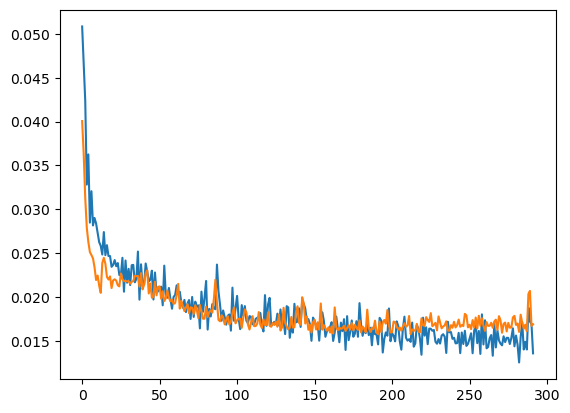

In [209]:
plt.plot(train_loss)
plt.plot(val_loss)